In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime

In [11]:
ticker='PG'
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2024,3,23)

try:
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    PG = pd.DataFrame(data)
    #data.columns = [ticker]
    #print(data.head())
except Exception as e:
    print(f"Ocurrio un error al intentar descargar los datos:{e}")

[*********************100%%**********************]  1 of 1 completed


In [12]:
PG.head()

,Adj Close
Date,
2014-01-02,59.643776
2014-01-03,59.577110
2014-01-06,59.717812
2014-01-07,60.295441
2014-01-08,59.421574


In [13]:
PG.tail()

,Adj Close
Date,
2024-03-18,160.175735
2024-03-19,160.791748
2024-03-20,160.950729
2024-03-21,160.821564
2024-03-22,160.622849


## Retorno simple

$$\frac{P_1-P_0}{P_0}=\frac{P_1}{P_0}-1$$

In [14]:
PG['simple_return'] = ((PG['Adj Close'] / PG['Adj Close'].shift(1) - 1))

In [15]:
print(PG['simple_return'])

Date
2014-01-02         NaN
2014-01-03   -0.001118
2014-01-06    0.002362
2014-01-07    0.009673
2014-01-08   -0.014493
                ...   
2024-03-18   -0.001053
2024-03-19    0.003846
2024-03-20    0.000989
2024-03-21   -0.000803
2024-03-22   -0.001236
Name: simple_return, Length: 2573, dtype: float64


<Axes: xlabel='Date'>

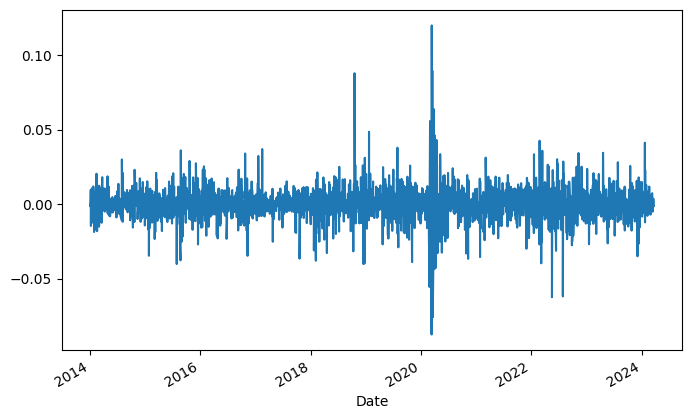

In [16]:
PG['simple_return'].plot(figsize=(8,5))

## Retorno logaritmico

$$\log\left(\frac{P_1}{P_0}\right)$$

In [17]:
PG['log_return'] = np.log((PG['Adj Close'] / PG['Adj Close'].shift(1) ))

In [18]:
print(PG['log_return'])

Date
2014-01-02         NaN
2014-01-03   -0.001118
2014-01-06    0.002359
2014-01-07    0.009626
2014-01-08   -0.014599
                ...   
2024-03-18   -0.001054
2024-03-19    0.003838
2024-03-20    0.000988
2024-03-21   -0.000803
2024-03-22   -0.001236
Name: log_return, Length: 2573, dtype: float64


<Axes: xlabel='Date'>

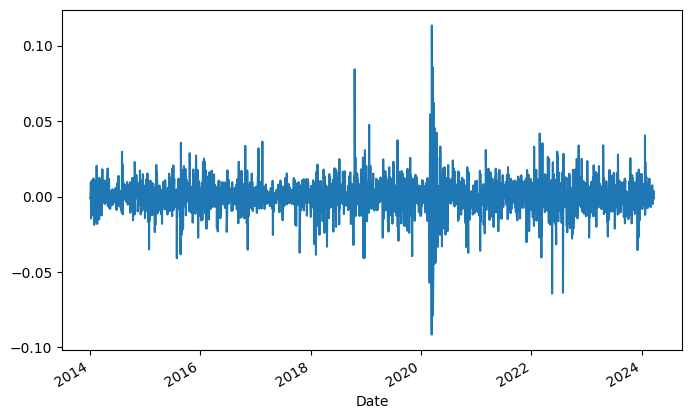

In [19]:
PG['log_return'].plot(figsize=(8,5))

In [20]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

# Este es el retorno diario

0.00045038321819822414

In [21]:
# El retorno anual, se calcula no multiplicando por 365, pues no hay actividad diaria realmente.
# Por quitar días sabado, domingo y feriados.
# Lo correcto es 250, a veces 251 o 252 
# Así, el retorno anual es

In [22]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.11259580454955603

In [23]:
print(str(round(avg_returns_a, 5) * 100) + '%') 

11.26%
